# ¿Qué son los **"jobs"** en **Dataproc**?

Un "job" es una tarea específica que se ejecuta en el clúster de Dataproc.
Pueden ser de varios tipos, trabajos de Spark, de MapReduce (como el que vimos en el anterior notebook), de Hive, Pig u otros...
Los jobs en Dataproc permiten ejecutar grandes volúmenes de procesamiento de datos de manera distribuida utilizando distintos frameworks como los que acabamos de mencionar. Por ejemplo:


*   Spark jobs:
  *   Ejecuta aplicaciones de Apache Spark
  *   Sirve para procesar datos en memoria, realizar análisis de datos en tiempo real, machine learning...

*   MapReduce jobs:
  *   Ejecuta tareas de MapReduce utilizando el framework Hadoop.
  *   Sirve para procesamiento por lotes, ETL...

*   Hive jobs:
  *   Ejecuta consultas SQL en Hive.
  *   Sirve para realizar consultas SQL sobre grandes conjuntos de datos almacenados en HDFS o Cloud Storage.

*   Pig jobs:
  *   Ejecuta scripts de Apache Pig.
  *   Sirve para realizar procesamiento y análisis de datos de grandes volúmenes utilizando lenguaje de alto nivel.

*   PySpark jobs:
  *   Ejecuta aplicaciones de Spark.
  *   Sirve para procesar datos en memoria utilizando Python.

## ¿Por qué son tan útiles los jobs?


*   Escalabilidad: Procesa grandes volúmenes de datos de manera distribuida.
*   Flexibilidad: Soporte para múltiples frameworks de procesamiento de datos.
*   Gestión Simplificada: Google Cloud gestiona la infraestructura subyacente, permitiéndote enfocarte en el código.
*   Integración: Fácil integración con otros servicios de Google Cloud como Cloud Storage, BigQuery, y más.


## Y... ¿Cómo ejecutamos jobs sin tener que lanzar comandos a mano?

Lo bueno de Dataproc es que podemos hacer uso del control de ficheros directo a **través de la consola** y **también podemos ejecutar jobs desde aquí**:


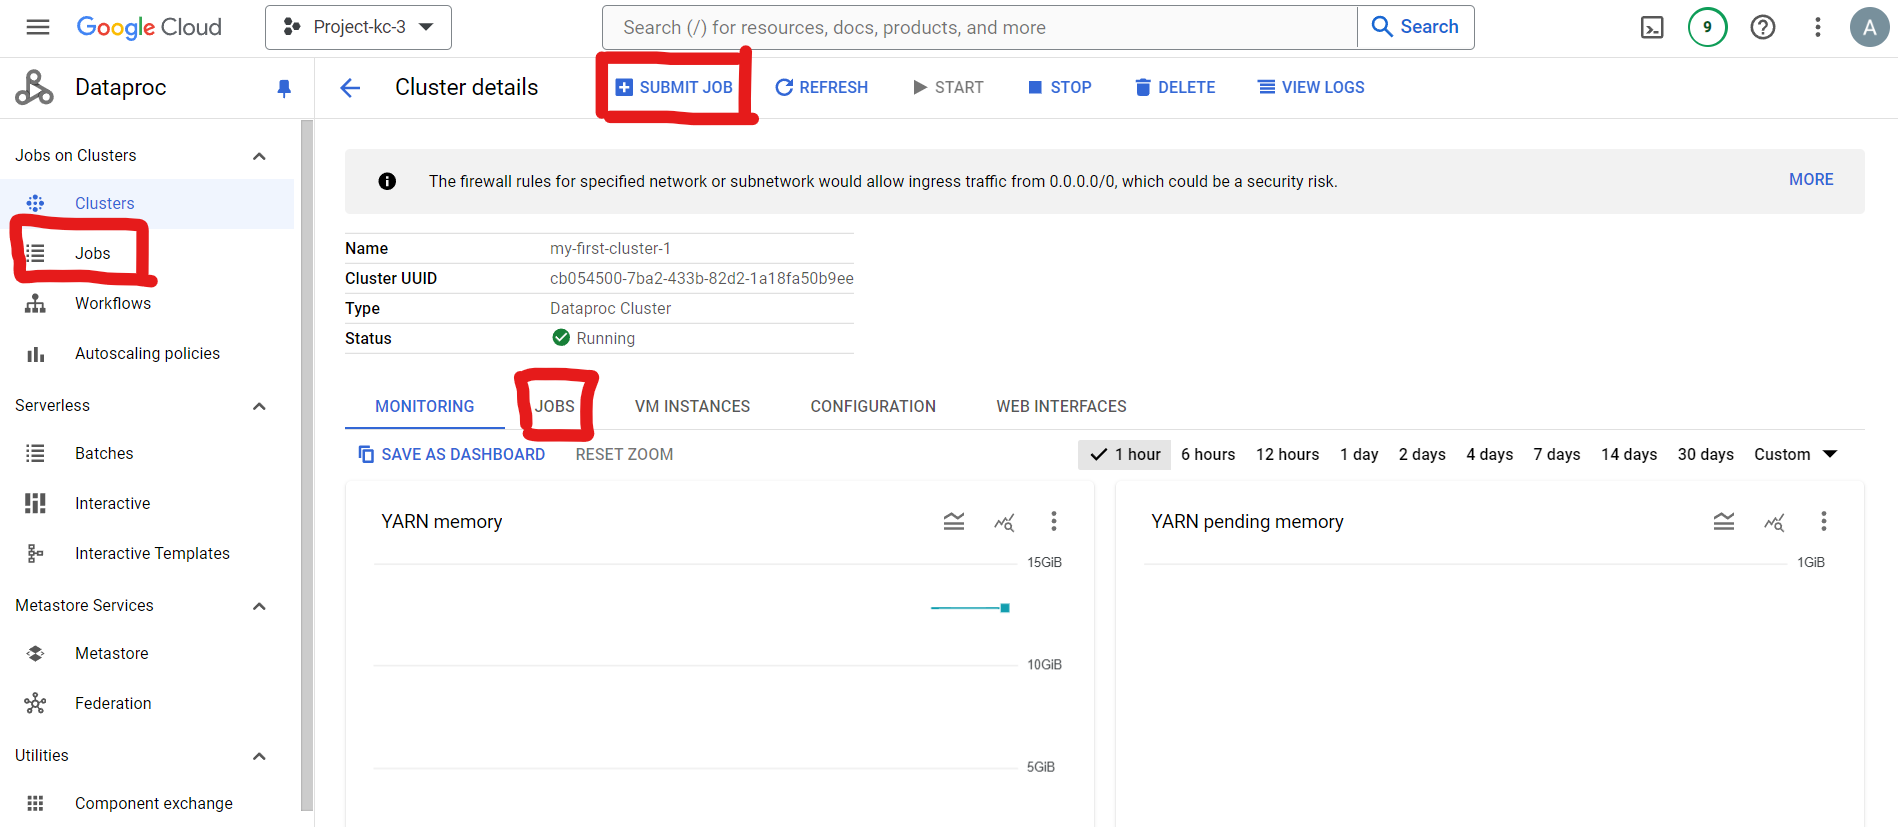

Echemos un vistazo a los **Jobs del cluster**, también a la **pestaña Jobs** del menú y por último, creémos un Job con **Submit Job**

Se nos abre un pequeño menú para **configurar el job**. Volvamos a calcular PI con las tareas de ejemplo que vienen preconfiguradas!

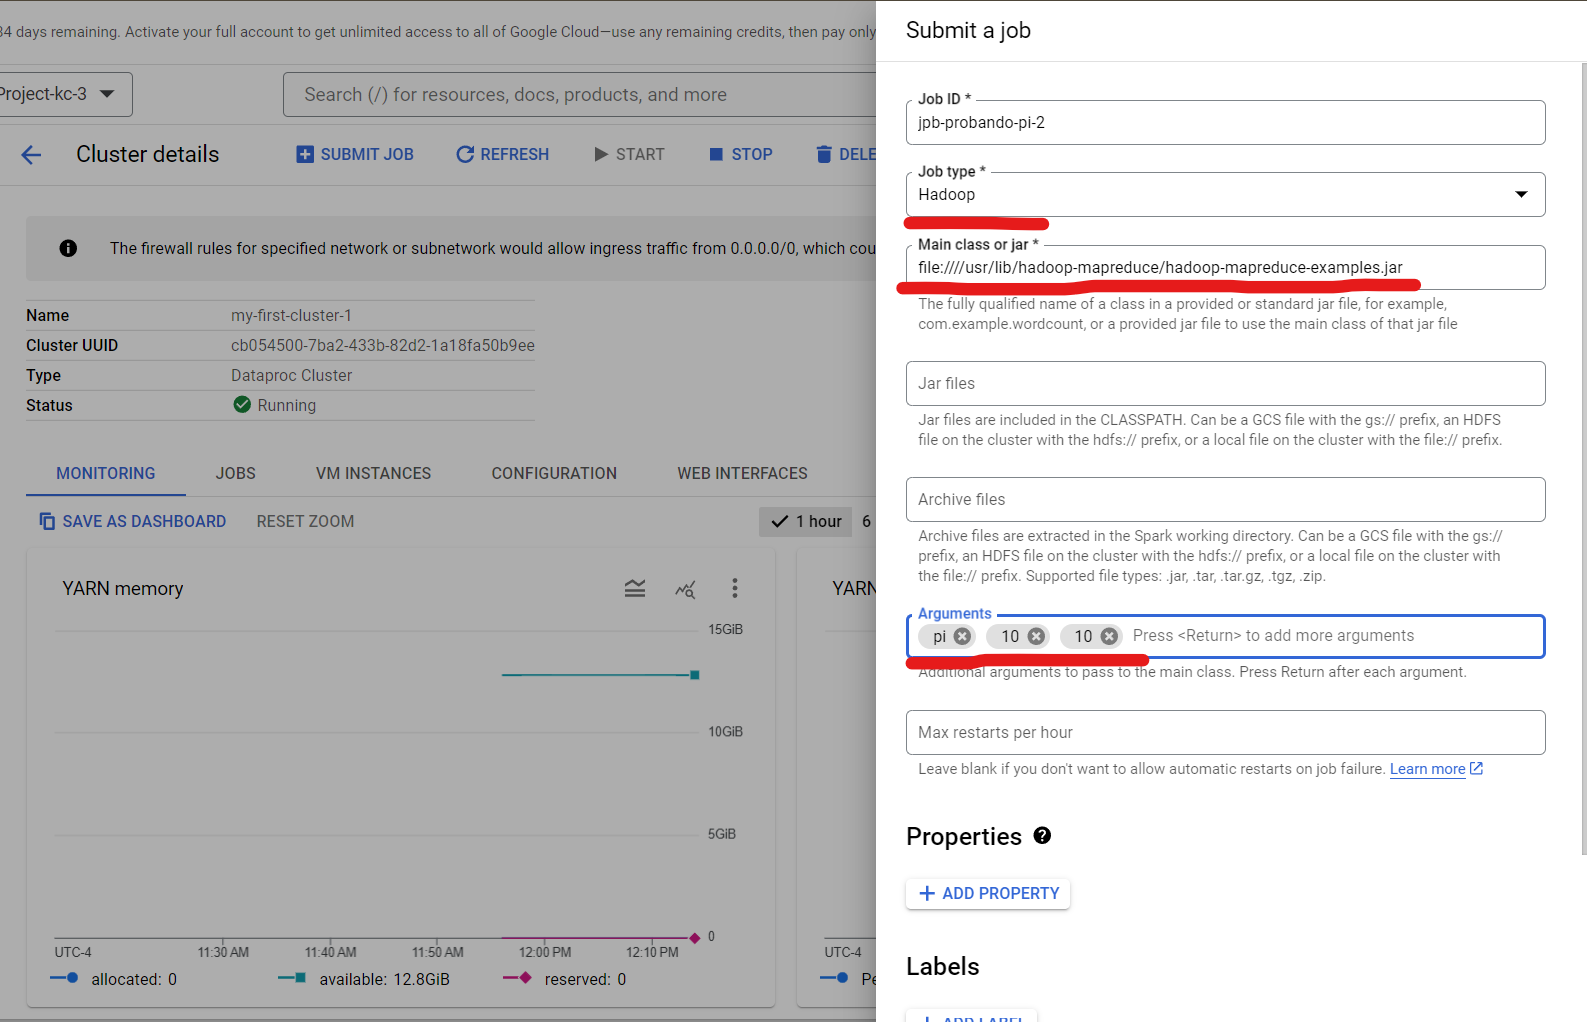

JAR: `file:////usr/lib/hadoop-mapreduce/hadoop-mapreduce-examples.jar`

Y hacemos click en **Submit**

Ahora podemos ir a la **lista de Jobs** y ver resultado:

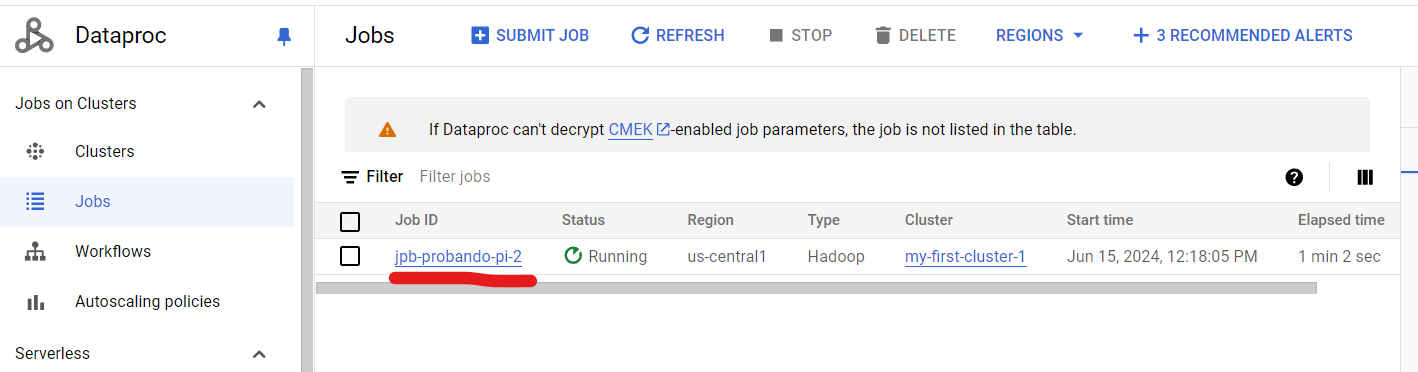

Veamos también el monitoreo del Job y el output:

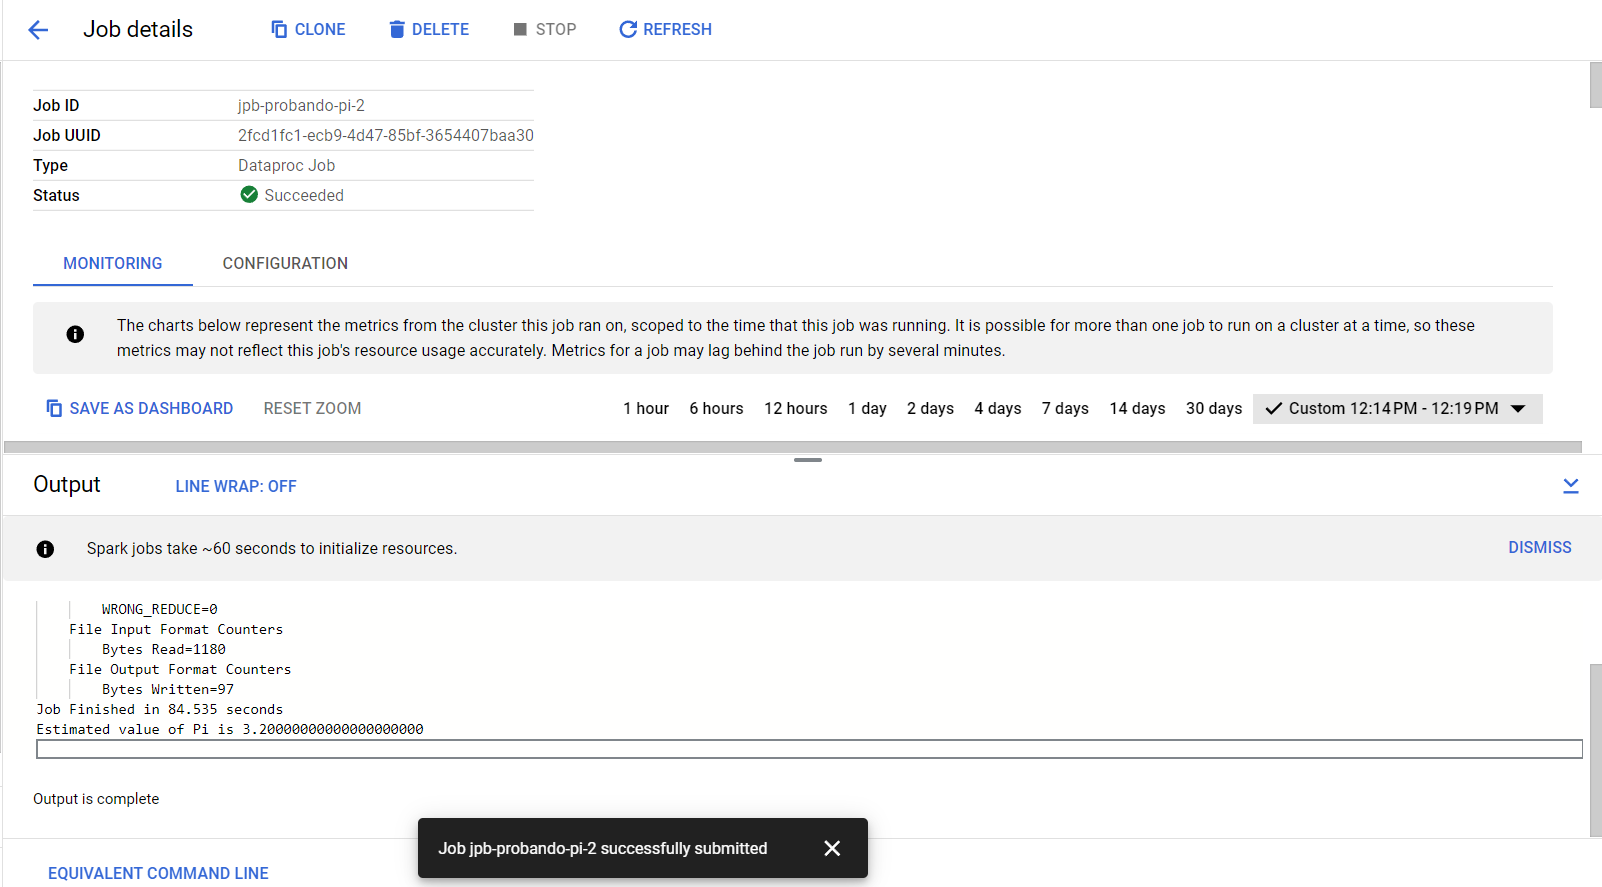


Un poco más de info en una guía sobre Jobs: **https://cloud.google.com/dataproc/docs/guides/submit-job**

# **Subir** y **utilizar** ficheros en Jobs

Como ya vimos, al crear un cluster, Google Cloud automáticamente crea un **bucket** (el equivalente en AWS sería un bucket de S3), conectado al cluster a través de un **conector** (https://cloud.google.com/dataproc/docs/concepts/connectors/cloud-storage).
De este modo, podemos subir ficheros al bucket y tenerlos disponibles para **ejecutar jars** o **cargar datos en HDFS**

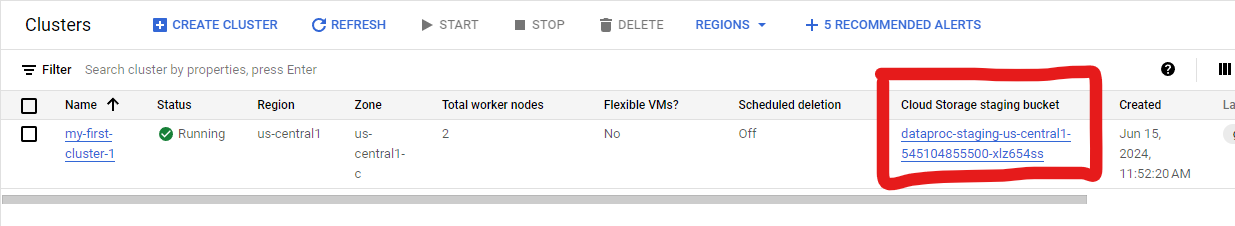

Desde ahí podemos hacer click y acceder directamente al bucket o, ir al menú Cloud Storage -> Buckets donde también aparecerá.

De hecho, aparecerán dos: el staging y el temp. El staging es en el que debemos subir nuestros ficheros, ya que el temp, como su propio nombre indica, lo crea Dataproc para archivos temporales:

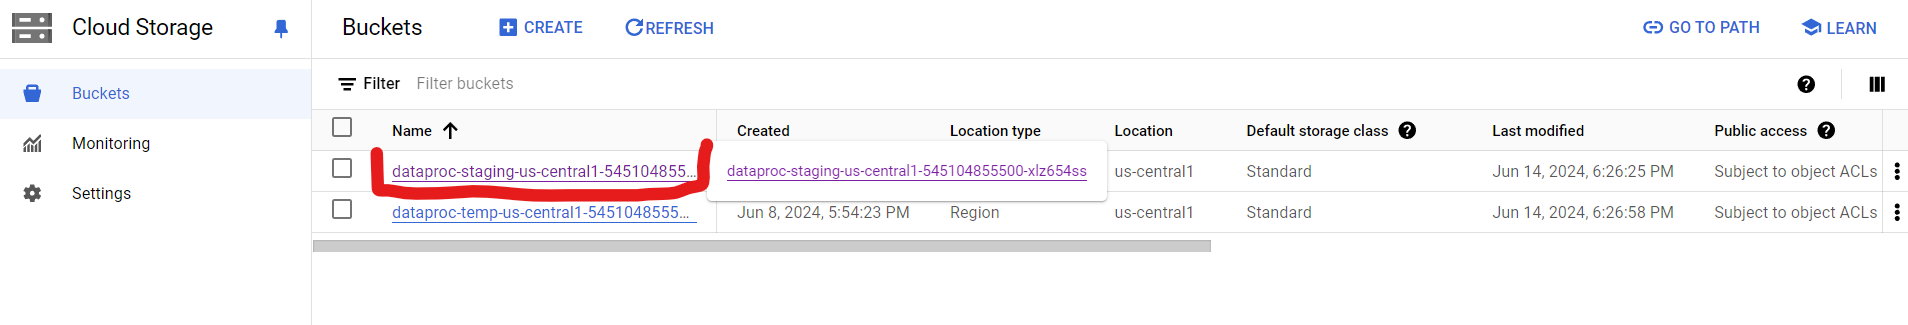

### Vamos a descargarnos un "pequeño" dataset de noticias con el que podremos ejecutar una tarea de conteo de palabras:

https://www.kaggle.com/code/bkkaggle/subset-all-the-news-dataset/output?select=all-the-news-subset.csv

Lo subimos:

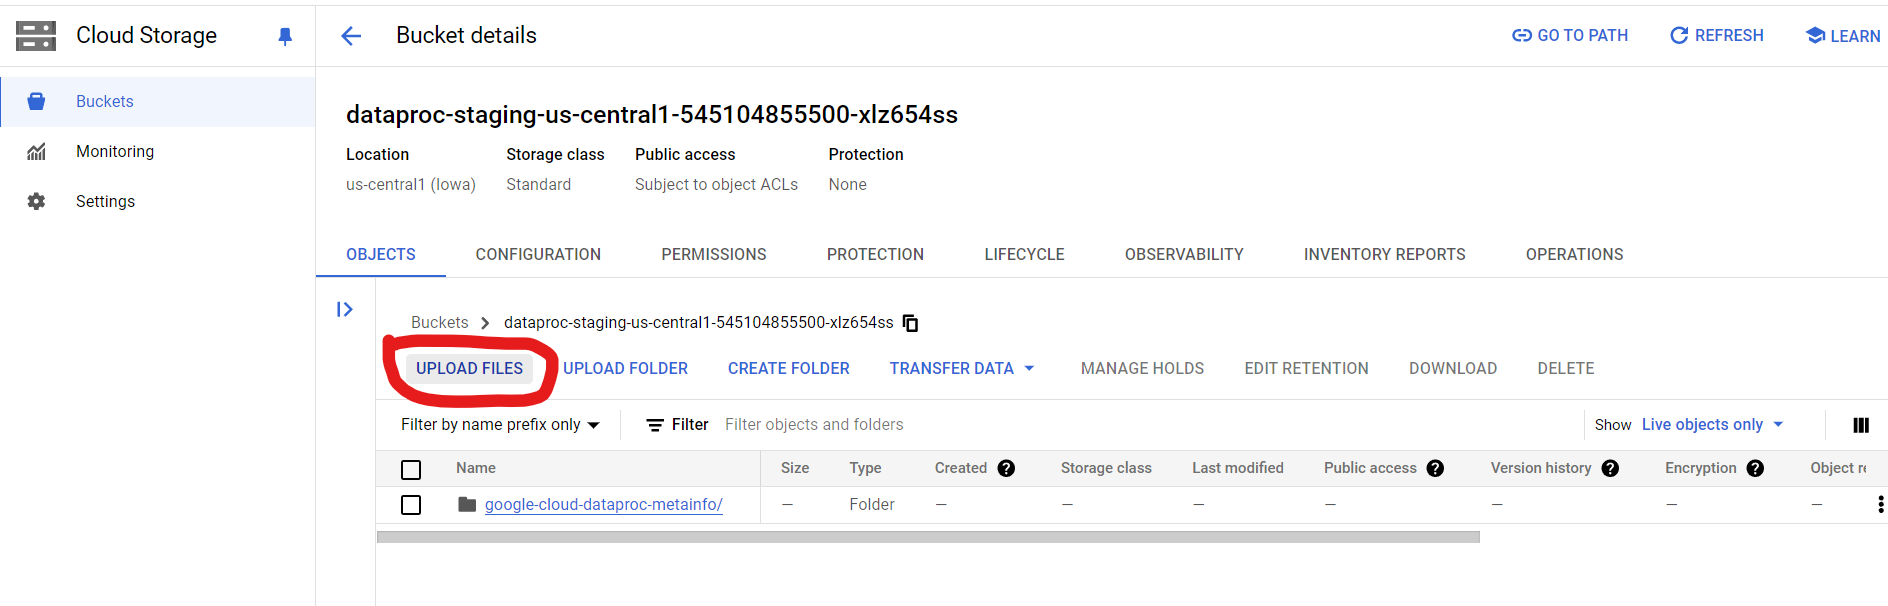

Ahora, vayamos a nuestro cluster y creamos una nueva tarea, como antes:




Main class or jar: `file:////usr/lib/hadoop-mapreduce/hadoop-mapreduce-examples.jar`

Arguments:
    `wordcount`
    `gs:///nombre_del_bucket/nombre_del_fichero.csv`
    `output`


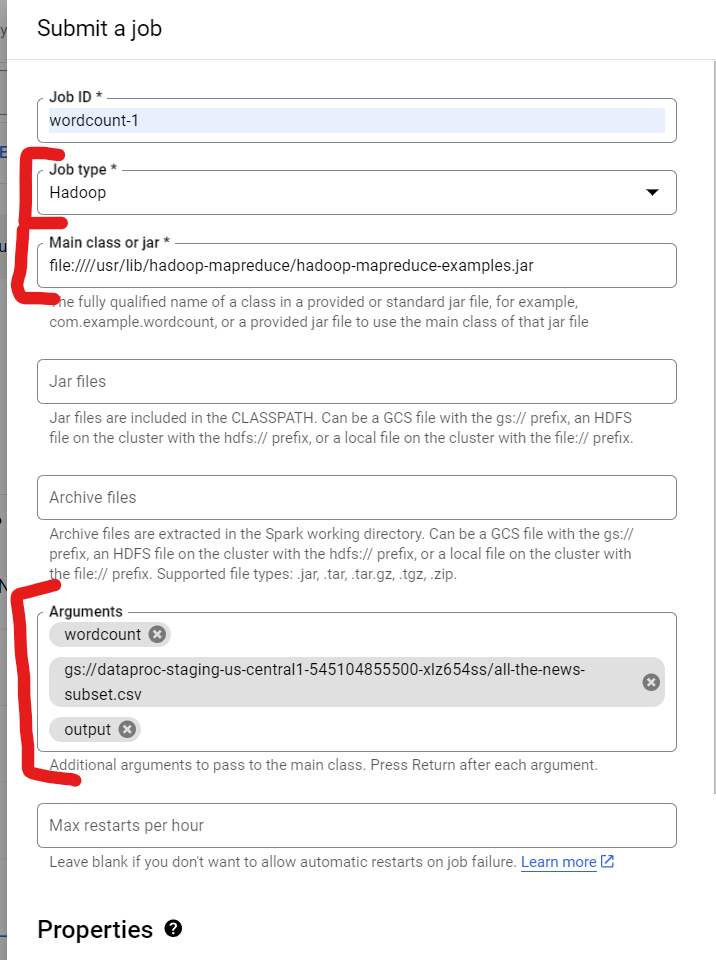

Una vez ejecutada la tarea, igual que antes, podemos ver el output y el monitoreo de esta:

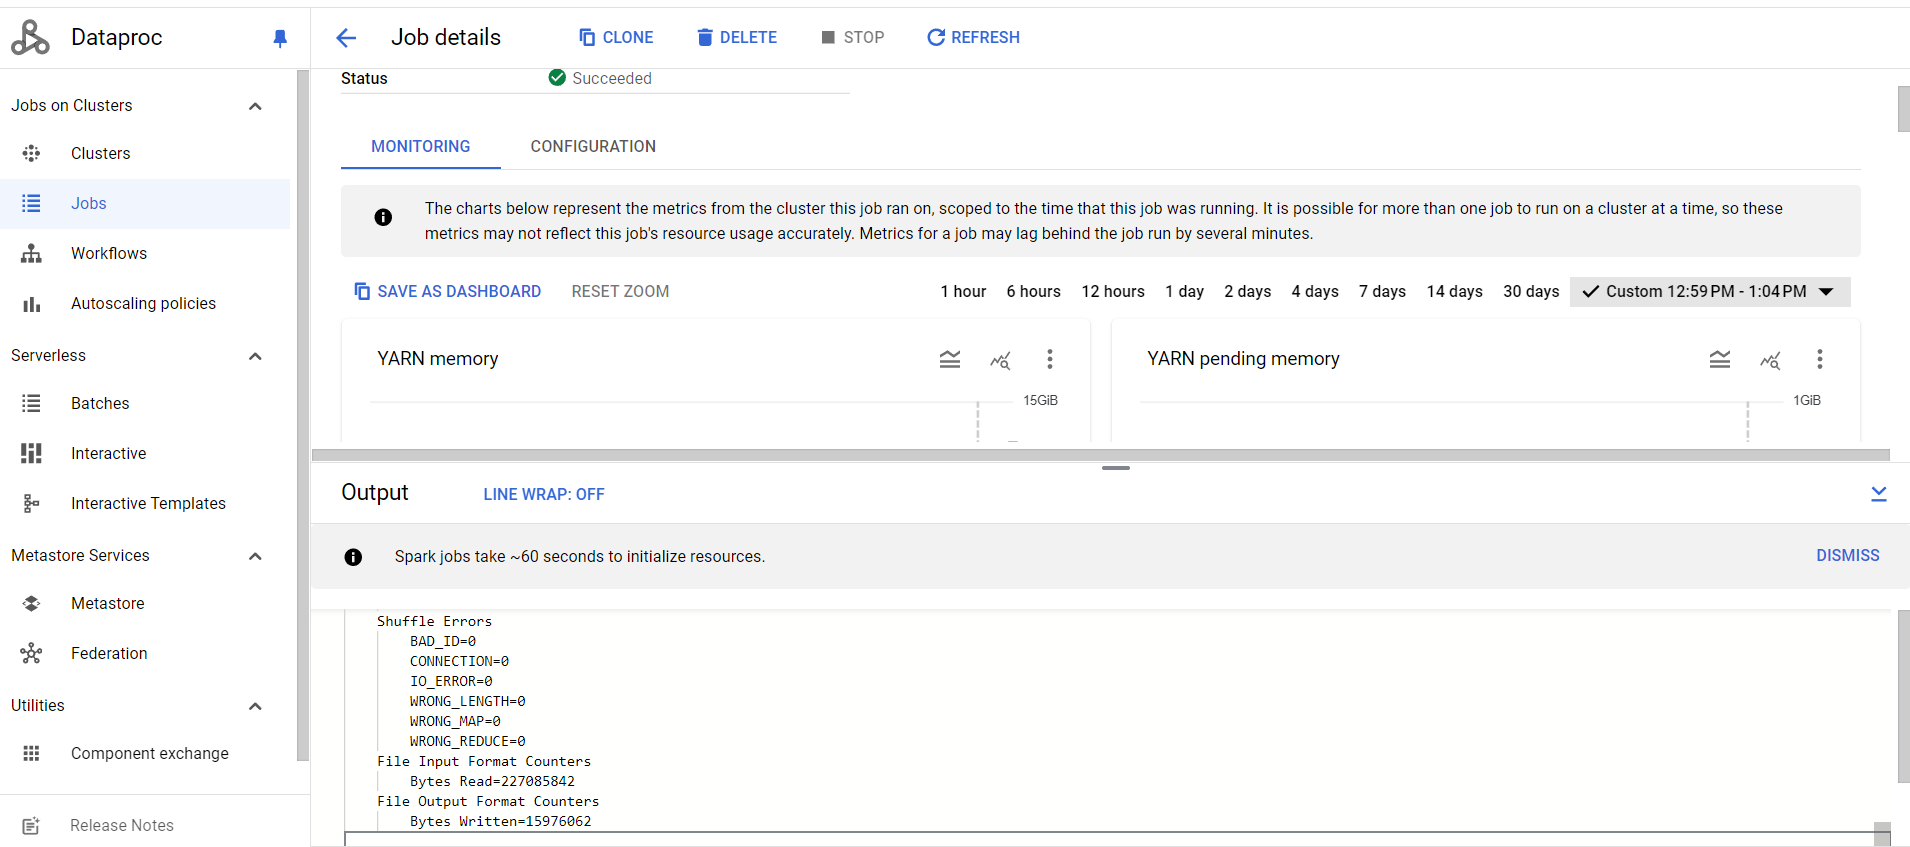

# Veamos el resultado de la tarea de conteo en la consola!

Para eso, vamos a **abrir la consola SSH** de la VM maestra del cluster:

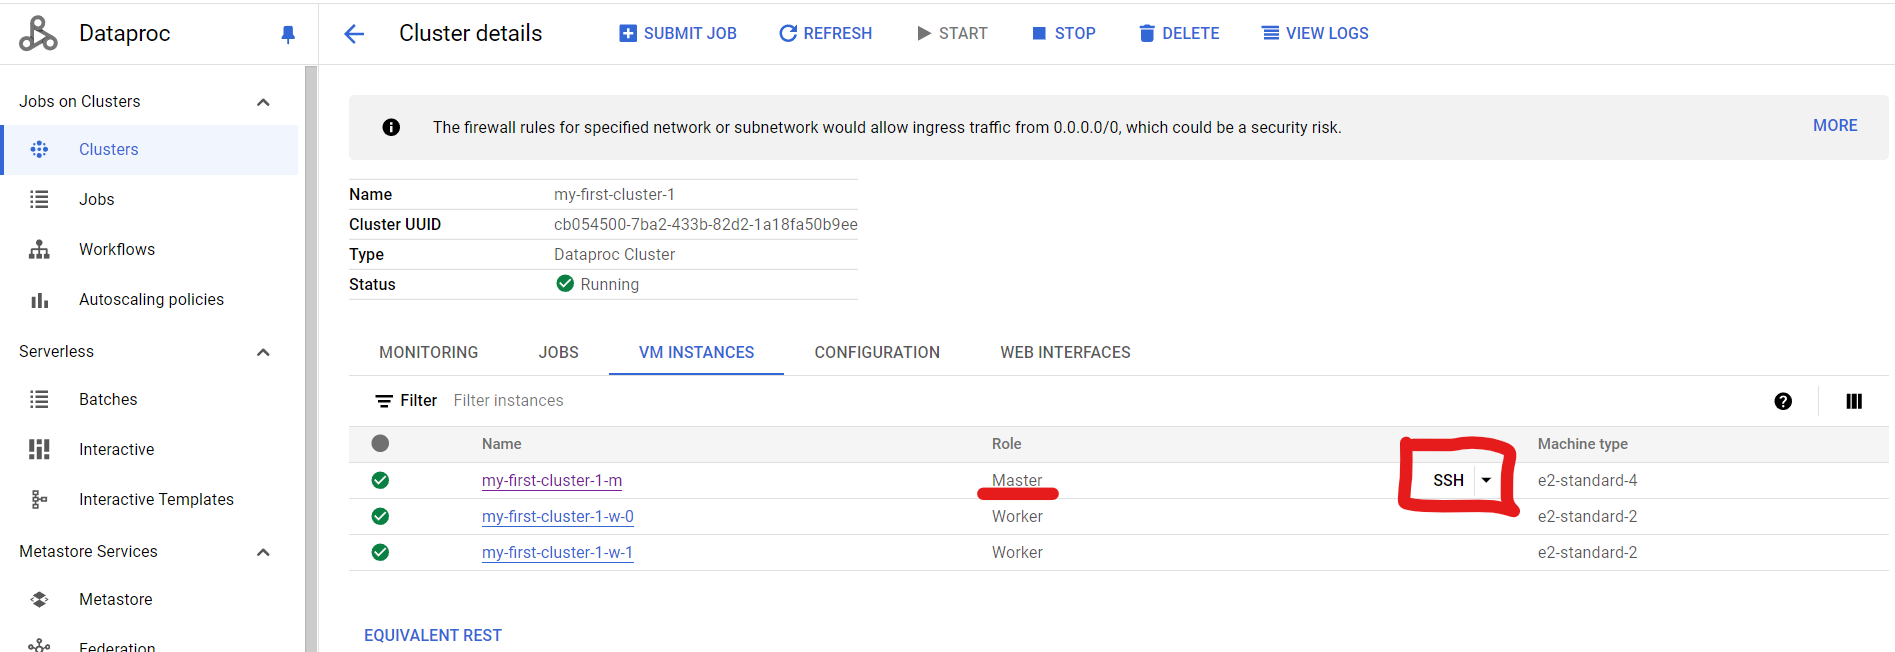

1- Listamos la raíz para ver qué archivos hay, y a partir de ahí seguiremos la ruta:

```
hdfs dfs -ls /
```

```
hdfs dfs -ls /user
```

```
hdfs dfs -ls /user/root
```

```
hdfs dfs -ls /user/root/
```

```
hdfs dfs -ls /user/root/output
```

Como se trataba de un fichero grande sobre el que se ejecutó la tarea, ha tenido que dividirla en tres partes:

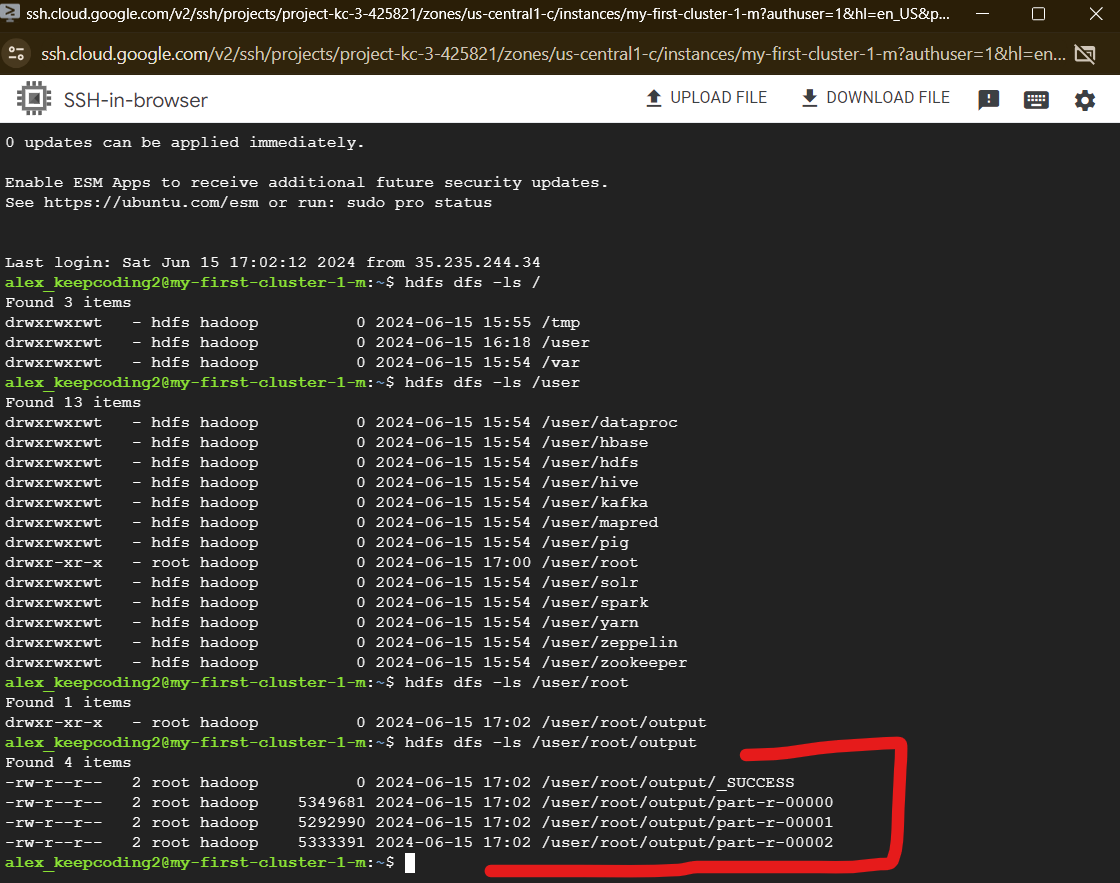

El primer archivo que aparece además, llamado **_SUCCESS** es un flag que nos indica que la tarea ha tenido éxito.

Veamos ahora el contenido de cualquiera de los archivos generados:

```
hdfs dfs -cat /user/root/output/part-r-00002
```

Nos está mostrando un archivo muuuuuy largo, con las veces que ha aparecido cada palabra o token (considera una palabra cualquier contenido entre dos espacios).

# ¿Qué hemos visto en este notebook?



*   Hablamos acerca de qué son los Jobs o tareas en un cluster Dataproc
*   Hemos visto qué tipos de jobs existen
*   Tabmién subimos un fichero al bucket del cluster
*   Lanzamos una tarea un poco más grande en el cluster que nos permitía hacer un conteo de tokens o palabras del fichero
*   Volvimos a la consola de la máquina master del cluster para ver los resultados del job



# **Recuerda!!!**

Apaga el cluster al terminar, sino, te consumirá los créditos!

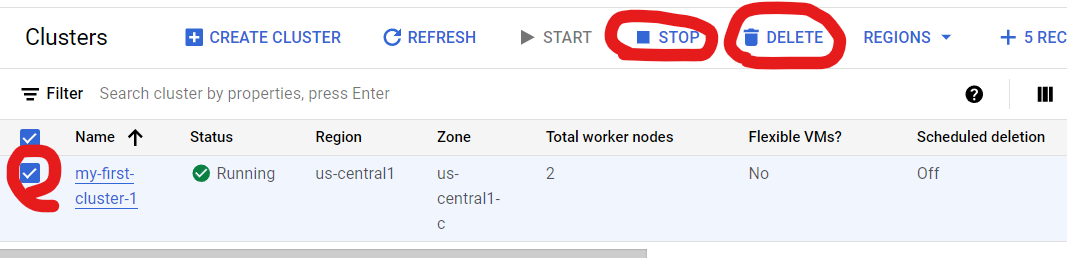

